In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
cointag = pd.read_csv("coin_tags.csv")
coin = pd.read_csv("coins200.csv")
information = pd.read_csv("coins_information.csv")
tags = pd.read_csv("tags.csv")

In [3]:
information['pricedif'] = information.apply( lambda row : row.close - row.open , axis=1 )

In [4]:
help = information["timestamp"].copy()
df = information[["Symbol", "pricedif"]].copy()

df["date"] = pd.to_datetime(help)
df = df[df['date'].dt.month <= 5]
df = df[df['date'].dt.month >= 3]

df = df.sort_values(by=['date', "Symbol"])
check = df["pricedif"] > 0

In [5]:
cnt = [None] * 6
num = [None] * 6
for i in range(6):
    cnt[i] = [0] * 32
    num[i] = [0] * 32

In [6]:
final_list = list(set(df[df["date"].dt.month==5]["Symbol"]))
dic = {}
for i in final_list:
    dic[i] = 0

In [7]:
for i in range(3,6):
    for j in range(1,32):
        if(i == 4 and j == 31):
            continue
        hlp = df[(df["date"].dt.month==i) & (df["date"].dt.day==j)]
        sym = list(hlp["Symbol"])
        num[i][j] = len(sym)
        for k in sym:
          if(hlp[hlp["Symbol"]==k]["pricedif"].values[0] > 0):
              cnt[i][j] += 1
        if cnt[i][j] <= num[i][j] * 0.35:
            for k in sym:
                if(hlp[hlp["Symbol"]==k]["pricedif"].values[0] > 0):
                    dic[k] += 1

In [8]:
keys = list(dic.keys())
values = list(dic.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [9]:
keys = list(sorted_dict.keys())
n = len(keys)
ans = []
for i in range(n-10,n):
    ans.append(keys[i])
    print(keys[i], dic[keys[i]])

USDP 14
TUSD 16
MX 16
USDD 17
DAI 19
LEO 19
PAXG 20
XAUt 20
USDT 21
USDC 29


In [10]:
sorted_dict
information
n
for i in ans:
    print(coin[coin["Symbol"] == i]["Name"])
# y

62    Pax Dollar
Name: Name, dtype: object
23    TrueUSD
Name: Name, dtype: object
102    MX TOKEN
Name: Name, dtype: object
46    USDD
Name: Name, dtype: object
11    Dai
Name: Name, dtype: object
18    UNUS SED LEO
Name: Name, dtype: object
66    PAX Gold
Name: Name, dtype: object
67    Tether Gold
Name: Name, dtype: object
2    Tether USDt
Name: Name, dtype: object
5    USD Coin
Name: Name, dtype: object


In [11]:
market = information[["Symbol", "marketCap"]]
market = market.groupby("Symbol").agg({'marketCap': 'sum'})
market.reset_index(inplace=True)
market

,Symbol,marketCap
0,1INCH,1.294059e+11
1,AAVE,3.657602e+11
2,ACH,3.930310e+10
3,ADA,4.400294e+12
4,AGIX,9.197453e+10
...,...,...
195,YFI,9.270237e+10
196,ZEC,2.326637e+11
197,ZEN,4.969304e+10
198,ZIL,1.389741e+11


In [12]:
market_list = []
for i in ans:
    market_list.append(market[market["Symbol"] == i]["marketCap"].values[0])
market_list

[315886688103.19,
 605863019164.92,
 63464121239.72,
 264623978096.51,
 2005316620386.78,
 1304139356741.21,
 188882201431.09,
 167016376685.01,
 27165455061790.28,
 13557836958676.95]

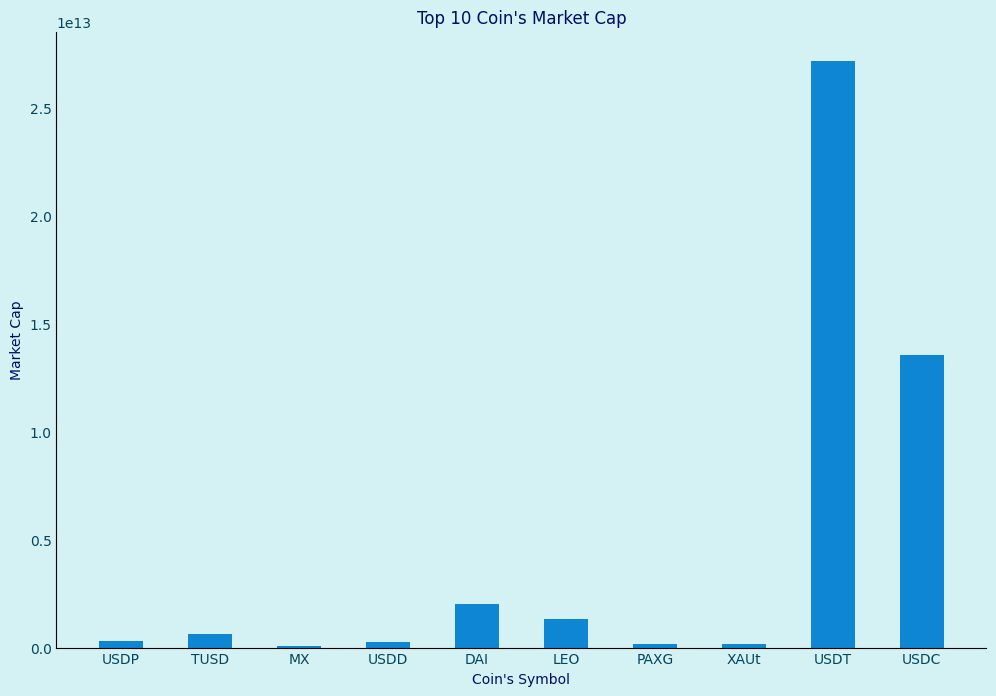

In [13]:
fig = plt.figure(figsize =(12, 8))
axis = plt.axes()
fig.set_facecolor("#D4F1F4")

axis.set_facecolor("#D4F1F4")
axis.spines.right.set_visible(False)
axis.spines.top.set_visible(False)
axis.tick_params(size=0, colors="#05445E")

plt.bar(ans, market_list, color ='#0E86D4', width = 0.5)
plt.xlabel("Coin's Symbol", color="#000C66")
plt.ylabel("Market Cap", color="#000C66")
plt.title("Top 10 Coin's Market Cap", color="#000C66")

plt.show()